In [1]:
#importing Python libraries
from datascience import *
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline

sns.set_style('white')

In [2]:
#creating the data table
#link to the original dataset here: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1

aac = Table.read_table('aac_intakes_outcomes.csv')

In [3]:
#data cleaning: dropping any columns that are irrelevant to this data analysis
aac_filtered = aac.drop('age_upon_outcome','animal_id_outcome','date_of_birth','outcome_subtype','sex_upon_outcome','age_upon_outcome_(days)','age_upon_outcome_(years)','age_upon_outcome_age_group','outcome_datetime','outcome_month','outcome_year','outcome_monthyear','outcome_weekday','outcome_hour','outcome_number','dob_year','dob_month','dob_monthyear','age_upon_intake','animal_id_intake','breed','found_location','intake_condition','intake_type','sex_upon_intake','count','age_upon_intake_(days)','age_upon_intake_age_group','intake_datetime','intake_month','intake_year','intake_monthyear','intake_weekday','intake_hour','intake_number','time_in_shelter')

In [4]:
#converting to Pandas DataFrame, to make the data easier to work with
aac = aac_filtered.to_df()
aac.set_index(['animal_type'])
aac

,outcome_type,animal_type,color,age_upon_intake_(years),time_in_shelter_days
0,Return to Owner,Dog,Yellow/White,10.000000,0.588194
1,Return to Owner,Dog,Yellow/White,7.000000,1.259722
2,Return to Owner,Dog,Yellow/White,6.000000,1.113889
3,Transfer,Dog,Tricolor,10.000000,4.970139
4,Return to Owner,Dog,Brown/White,16.000000,0.119444
5,Return to Owner,Dog,Black/White,15.000000,0.870833
6,Return to Owner,Dog,Black/Gray,15.000000,0.178472
7,Return to Owner,Dog,Brown/White,15.000000,0.213194
8,Return to Owner,Dog,White/Black,15.000000,6.258333
9,Return to Owner,Dog,Brown/White,18.000000,0.054167


In [5]:
#data wrangling: renaming the columns, just for convenience and easy accessibility
aac.columns = ['outcome','animal_type','color','intake_age','time_in_shelter']

In [6]:
#My first research question deals with cats and dogs as separate data types
    #Separating the data into two separate DataFrames makes accessing certain data easier
aac_dogs = aac[aac.animal_type == 'Dog']
aac_cats = aac[aac.animal_type == 'Cat']

In [7]:
#Both of my research questions require that the outcome of the animals' time in the shelter be "adoption"
    #This simply drops any animals from the data that were not adopted from the shelter
    #I also randomly sampled 1000 cats and dogs from each data set. Without creating a smaller sample size,
        #each of these DataFrames would have been 10,000+ rows
aac_dogs_outcome = aac_dogs[aac_dogs.outcome == 'Adoption'].sample(1000)
aac_cats_outcome = aac_cats[aac_cats.outcome == 'Adoption'].sample(1000)

#creating variables to use for OLS regression testing
dX = aac_dogs_outcome.intake_age
dy = aac_dogs_outcome['time_in_shelter']
cX = aac_cats_outcome.intake_age
cy = aac_cats_outcome['time_in_shelter']

In [8]:
#building the regression model for the dog data
dX = sm.add_constant(dX)
model = sm.OLS(dy, dX).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        time_in_shelter   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     31.71
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           2.32e-08
Time:                        19:57:54   Log-Likelihood:                -5499.5
No. Observations:                1000   AIC:                         1.100e+04
Df Residuals:                     998   BIC:                         1.101e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2874      2.492      6.134      0.000      10.397      20.178
intake_age     4.6614      0.828      5.631      0.000       3.037       6.286
==============================================================================
Omnibus:                     1358.205   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           235517.077
Skew:                           7.438   Prob(JB):                         0.00
Kurtosis:                      76.696   Cond. No.                         4.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#calculating standard error
std_err = model.params - model.conf_int()[0]
std_err

const         4.890778
intake_age    1.624324
dtype: float64

In [10]:
#creating a regression model for the dog data
bd_df = pd.DataFrame({'name': std_err.index.values[1:], 'coef': model.params.values[1:], 'err': std_err.values[1:]})
bd_df

,name,coef,err
0,intake_age,4.661382,1.624324


In [11]:
#creating regression model for the cat data
cX = sm.add_constant(cX)
model = sm.OLS(cy, cX).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        time_in_shelter   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.262
Date:                Sat, 15 Dec 2018   Prob (F-statistic):              0.133
Time:                        19:57:54   Log-Likelihood:                -5304.7
No. Observations:                1000   AIC:                         1.061e+04
Df Residuals:                     998   BIC:                         1.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.8740      1.697     22.914      0.000      35.545      42.203
intake_age     0.9861      0.656      1.504      0.133      -0.300       2.273
==============================================================================
Omnibus:                      785.829   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17973.213
Skew:                           3.455   Prob(JB):                         0.00
Kurtosis:                      22.586   Cond. No.                         2.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#standard error calculation
std_err = model.params - model.conf_int()[0]
std_err

const         3.329134
intake_age    1.286536
dtype: float64

In [13]:
#regression model for cat data
bd_df = pd.DataFrame({'name': std_err.index.values[1:], 'coef': model.params.values[1:], 'err': std_err.values[1:]})
bd_df

,name,coef,err
0,intake_age,0.986056,1.286536


In [14]:
#performing a train/test split on both the cat and dog data
train_set_d, test_set_d = train_test_split(aac_dogs_outcome, test_size=0.3)
train_set_c, test_set_c = train_test_split(aac_cats_outcome, test_size=0.3)

In [15]:
#copying the data into variables for easy access
aac_do = train_set_d.copy()
aac_co = train_set_c.copy()

#describing one as a test
aac_co.describe()

,intake_age,time_in_shelter
count,700.000000,700.000000
mean,1.104387,41.517048
std,2.459107,50.016251
min,0.000000,0.032639
25%,0.082192,8.198958
50%,0.095890,26.230556
75%,0.760274,55.815104
max,16.000000,475.238194


In [16]:
#correlation test for cats
aac_co.corr()

,intake_age,time_in_shelter
intake_age,1.000000,0.068864
time_in_shelter,0.068864,1.000000


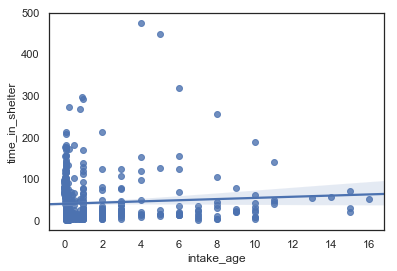

In [17]:
#creating a regression plot for time_in_shelter vs. intake_age for cats
sns.regplot(x="intake_age", y="time_in_shelter",data=aac_co)

In [18]:
#correlation test for dogs
aac_do.corr()

,intake_age,time_in_shelter
intake_age,1.000000,0.215089
time_in_shelter,0.215089,1.000000


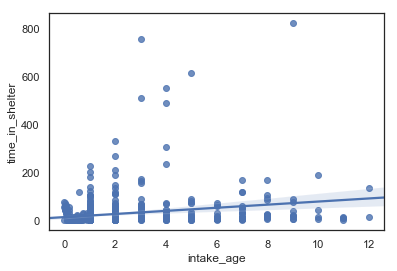

In [19]:
#regression plot for dogs
sns.regplot(x="intake_age", y="time_in_shelter",data=aac_do)

In [20]:
#combining the subsets for easy access to create a small multiple
result = pd.concat([aac_cats_outcome, aac_dogs_outcome])

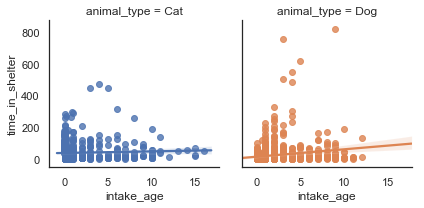

In [21]:
#creating a small multiple for easy comparison between dog and cat data
g = sns.FacetGrid(result, col="animal_type", hue="animal_type")
g = (g.map(sns.regplot, "intake_age", "time_in_shelter"))

In [22]:
#creating new subsets of data: one for black cats, one for non-black cats
aac_black = aac_cats_outcome[(aac_cats_outcome.color == 'Black') | (aac_cats_outcome.color == 'Black/Black')]
aac_nonblack = aac_cats_outcome[(aac_cats_outcome.color != 'Black') | (aac_cats_outcome.color != 'Black/Black')].sample(len(aac_black.index))

In [23]:
#preparing variables for OLS regression
bX = aac_black.intake_age
by = aac_black['time_in_shelter']
nbX = aac_nonblack.intake_age
nby = aac_nonblack['time_in_shelter']

In [24]:
#OLS regression for black cats
bX = sm.add_constant(bX)
model = sm.OLS(by, bX).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        time_in_shelter   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2723
Date:                Sat, 15 Dec 2018   Prob (F-statistic):              0.603
Time:                        19:57:56   Log-Likelihood:                -746.04
No. Observations:                 136   AIC:                             1496.
Df Residuals:                     134   BIC:                             1502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.9709      5.521      8.688      0.000      37.051      58.891
intake_age     1.4686      2.815      0.522      0.603      -4.098       7.035
==============================================================================
Omnibus:                      122.110   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1589.303
Skew:                           3.144   Prob(JB):                         0.00
Kurtosis:                      18.521   Cond. No.                         2.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#standard error for black cats
std_err = model.params - model.conf_int()[0]
std_err

const         10.920145
intake_age     5.566726
dtype: float64

In [26]:
#regression model for black cats
bd_df = pd.DataFrame({'name': std_err.index.values[1:], 'coef': model.params.values[1:], 'err': std_err.values[1:]})
bd_df

,name,coef,err
0,intake_age,1.468581,5.566726


In [27]:
#OLS regression for non-black cats
nbX = sm.add_constant(nbX)
model = sm.OLS(nby, nbX).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        time_in_shelter   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.3468
Date:                Sat, 15 Dec 2018   Prob (F-statistic):              0.557
Time:                        19:57:56   Log-Likelihood:                -727.79
No. Observations:                 136   AIC:                             1460.
Df Residuals:                     134   BIC:                             1465.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.2387      4.913      8.800      0.000      33.521      52.956
intake_age     0.9699      1.647      0.589      0.557      -2.287       4.227
==============================================================================
Omnibus:                       82.534   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              345.609
Skew:                           2.311   Prob(JB):                     8.95e-76
Kurtosis:                       9.295   Cond. No.                         3.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#standard error for non-black cats
std_err = model.params - model.conf_int()[0]
std_err

const         9.717617
intake_age    3.257056
dtype: float64

In [29]:
#regression model for non-black cats
bd_df = pd.DataFrame({'name': std_err.index.values[1:], 'coef': model.params.values[1:], 'err': std_err.values[1:]})
bd_df

,name,coef,err
0,intake_age,0.969854,3.257056


In [30]:
#train/test split for both black and non-black datasets
train_set_b, test_set_b = train_test_split(aac_black, test_size=0.3)
train_set_nb, test_set_nb = train_test_split(aac_nonblack, test_size=0.3)

In [31]:
#copying results into variables for easy access
aac_bo = train_set_b.copy()
aac_nbo = train_set_nb.copy()
aac_bo.describe()

,intake_age,time_in_shelter
count,95.000000,95.000000
mean,0.806229,52.659145
std,1.666733,65.284997
min,0.000000,2.189583
25%,0.076712,8.054861
50%,0.095890,36.963889
75%,0.452055,69.135417
max,9.000000,447.045833


In [32]:
#black cat correlation
aac_bo.corr()

,intake_age,time_in_shelter
intake_age,1.00000,0.10013
time_in_shelter,0.10013,1.00000


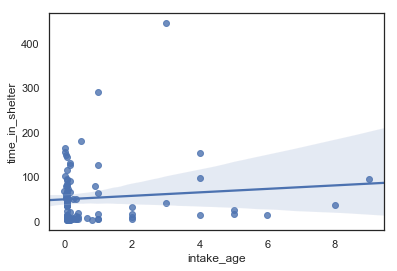

In [33]:
#regression plot for black cats
#The reason why I'm plotting time_in_shelter vs. intake_age is because if there ends up
    #being a difference in the results between black and non-black cats, it won't be
    #because of the age of the cats; the most likley factor to cause such a difference
    #would be the color of the cat
sns.regplot(x="intake_age", y="time_in_shelter",data=aac_bo)

In [34]:
aac_nbo.describe()

,intake_age,time_in_shelter
count,95.000000,95.000000
mean,1.187541,37.731806
std,2.438489,40.747437
min,0.000000,2.036806
25%,0.082192,6.948611
50%,0.164384,25.424306
75%,0.410959,54.033333
max,10.000000,206.774306


In [35]:
#non-black cat correlation
aac_nbo.corr()

,intake_age,time_in_shelter
intake_age,1.000000,0.156369
time_in_shelter,0.156369,1.000000


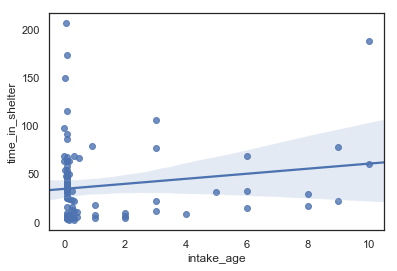

In [36]:
#regression plot for non-black cats
sns.regplot(x="intake_age", y="time_in_shelter",data=aac_nbo)

In [37]:
#defining all colors in each graph as either "black" or "nonblack" in their respective graphs
#This will make it easier to merge the two datasets and create a small multiple, since there
    #will only be two values for color
aac_black['color'] = 'Black'
aac_nonblack['color'] = 'Nonblack'

C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
#merging the datasets for easy access
result = pd.concat([aac_black, aac_nonblack])

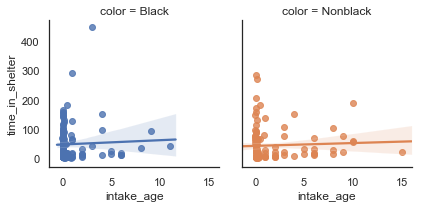

In [39]:
#creating a small multiple for easy comparison
#This is where redifing the colors is useful. Without redifining the colors, there would
    #be one row for each color (orange, black, black/white, white, etc., etc...)
g = sns.FacetGrid(result, col="color", hue="color")
g = (g.map(sns.regplot, "intake_age", "time_in_shelter"))